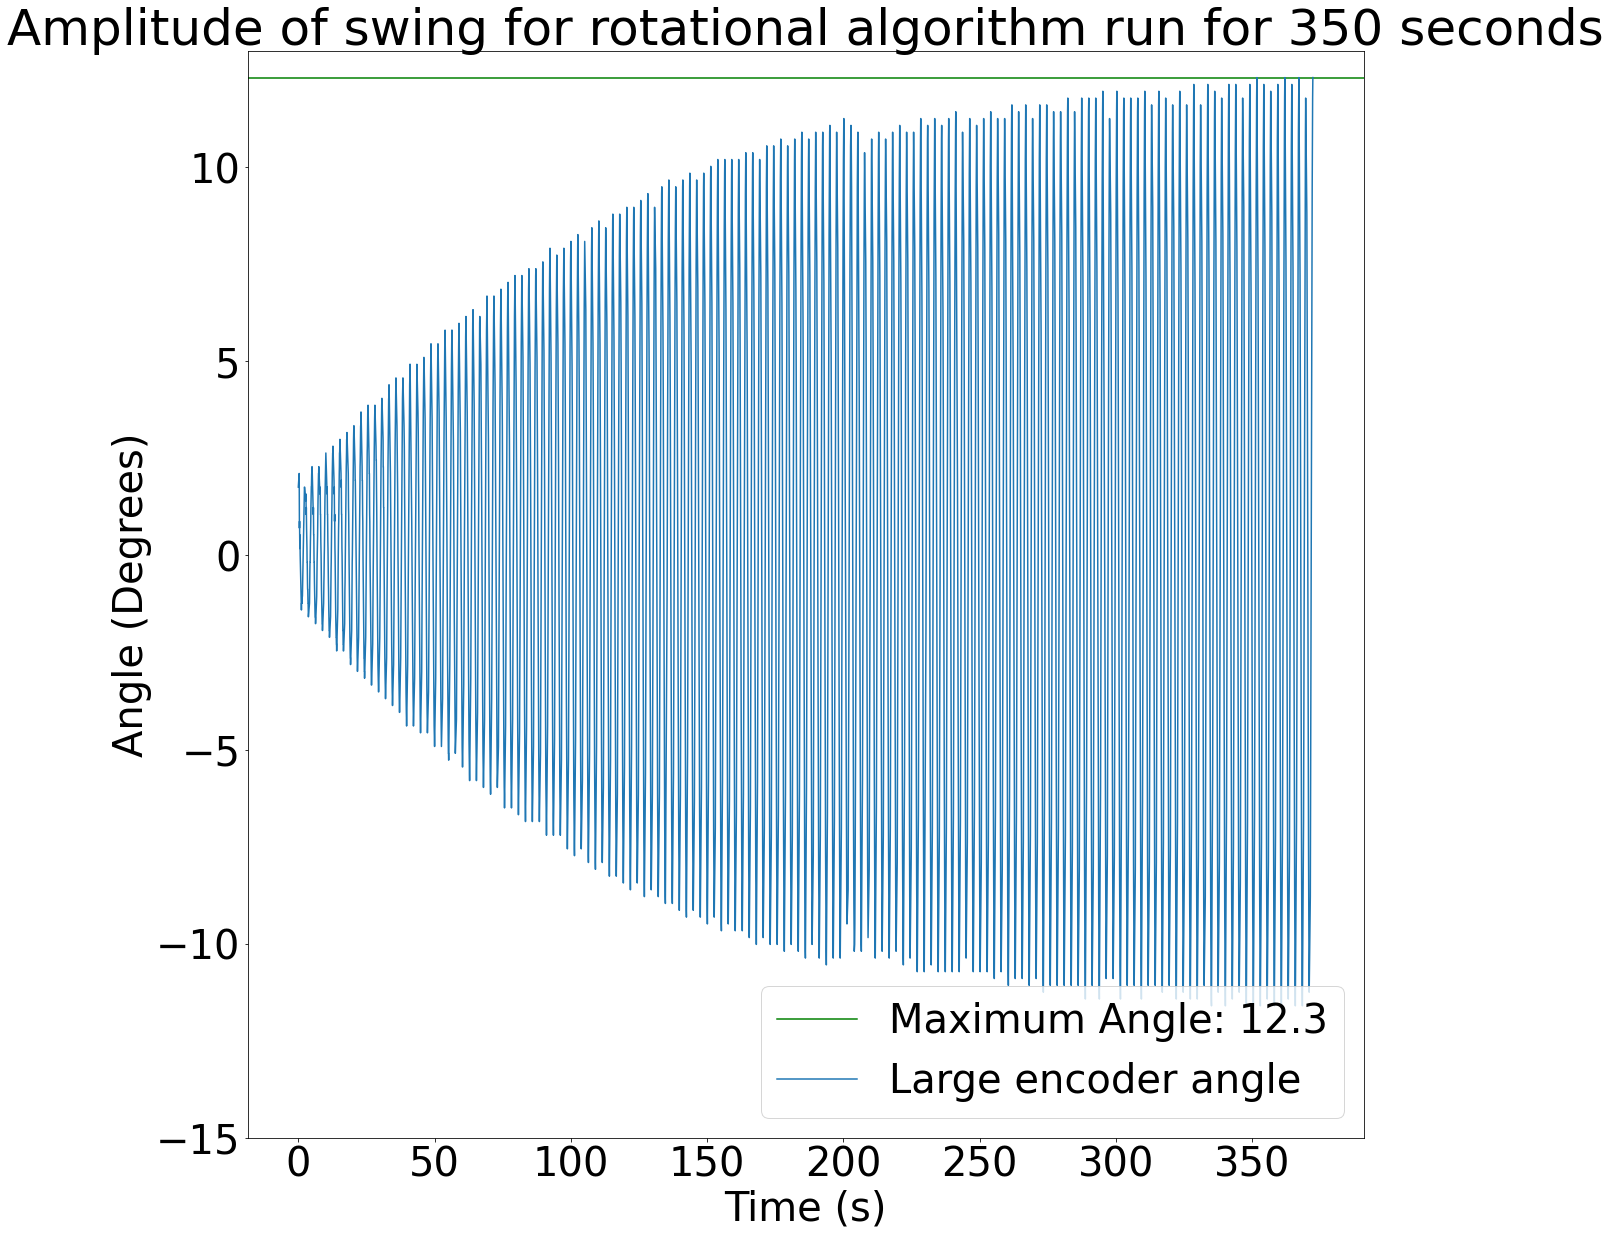

In [290]:
#used to plot Nao swinging, developed by Mathhew and myself 






import pickle
import matplotlib.pyplot as plt
import numpy as np


data = pickle.load(open( "0.83.txt", "rb" ) )### Remember to change the file name before doing another run otherwise it will overwrite
data = data[data[:,0]<20]
data = data[data[:,0]>-15]
plt.figure(figsize=(20,20))
plt.rc('font',size=40)
plt.xlabel('Time (s)')
plt.ylabel('Angle (Degrees)')
plt.title('', y= 1.04)

plt.axhline(y=max(data[:,0]),color='green',alpha=1,label='Maximum Angle: ' +str(np.round(max(data[:,0]),1)))
plt.ylim([-15, 13])
plt.plot(data[:,-1] - data[:,-1][0] ,data[:,0],label='Large encoder angle')
#plt.xticks(fontsize=14)
plt.legend(loc='lower right')
#plt.savefig(of_max+'delay.png')
plt.title("Amplitude of swing for rotational algorithm run for 350 seconds", fontsize = 50)
plt.show()

In [110]:

max(data[:,0])

11.953125

Max Amplitude
* 0.7: 11.953125
* 0.7 2: 12.65625
* 0.8: 12.3046875
* 0.8 2: 12.3046875
* 0.95: 11.953125
* 0.95 2: 10.37109375
* Max: 10.1953125
* 0.75: 10.1953125
* 0.7 3: 11.953125

In [34]:
def data_peaks(data):
    data1 = pickle.load(open(data+".txt", "rb" ) )
    
    data1 = data1[data1[:,0]<20]
        
    data1 = data1[data1[:,0]>-1]
    
    offset = -np.mean(data1[:,0])
    
    peaks_index = find_peaks(data1[:,0]+offset,prominence=3,distance = 50)[0]
    
    peaks = data1[peaks_index]
    
    xnew = np.linspace(0, peaks[:,-1][-1] - peaks[:,-1][0], 200) 
    
    #define spline
    spl = make_interp_spline(peaks[:,-1] - peaks[:,-1][0], peaks[:,0], k=2)
    y_smooth = spl(xnew)
    
    return [xnew,y_smooth]

[10.72265625, 10.938134843387907, 10.912868625989072]
10.83984375
[11.085206041450693, 10.794765806031307, 11.302924208239762]
11.044570553662268
[11.444016642078031, 11.116765436964128, 12.356739285001773]
11.611747309157119
[12.483476955789882, 12.168713215825008, 12.16578980720039]
12.085201737850701
[11.814093829933206, 12.085524177709665, 12.162649703603822]
11.883911614619143


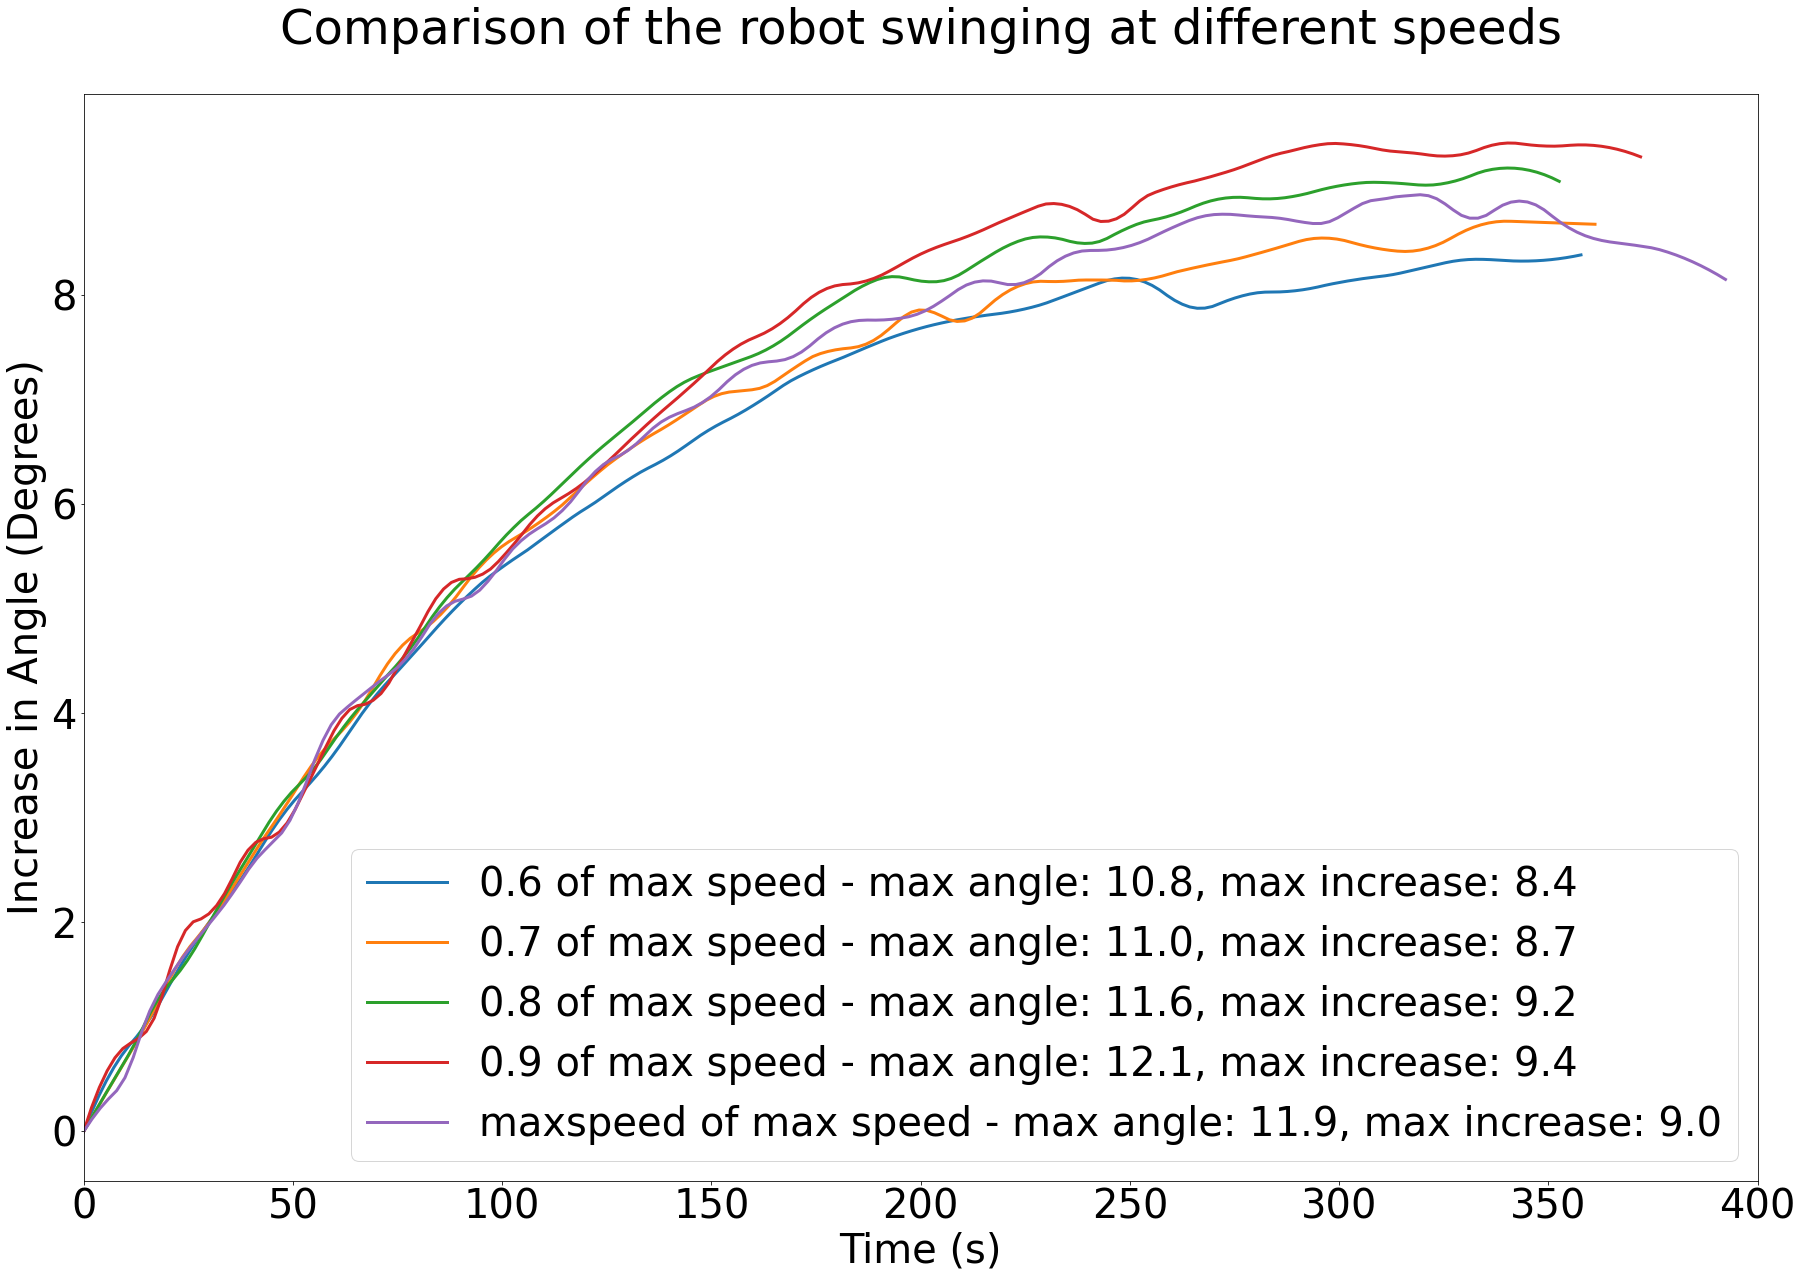

<Figure size 432x288 with 0 Axes>

In [144]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline, BSpline



plt.figure(figsize=(30,20))

plt.rc('font',size=40)
plt.xlabel('Time (s)')
plt.ylabel('Increase in Angle (Degrees)')
plt.title('Comparison of the robot swinging at different speeds', y= 1.04)

plt.xlim([0, 400])
#plt.ylim([10, 12.5])
#plt.semilogy()
super_av = []
for i in ['0.6','0.7','0.8','0.9','maxspeed']: 

    
    data = [data_peaks(i+str(j)) for j in range(1,4)]
    
    
    print ([max(data_peaks(i+str(k))[1]) for k in range(1,4)])
        
    av = np.average(data,axis=0)
    print (max(av[1]))
    super_av.append(av)
    plt.plot(av[0]-av[0][0],av[1]-av[1][0],label=str(i) +' of max speed - max angle: '+str(np.round(max(av[1]),1))+', max increase: '+str(np.round(max(av[1]-av[1][0]),1)),linewidth=3)

plt.legend()
plt.show()


plt.savefig('different_speed_v2.png')

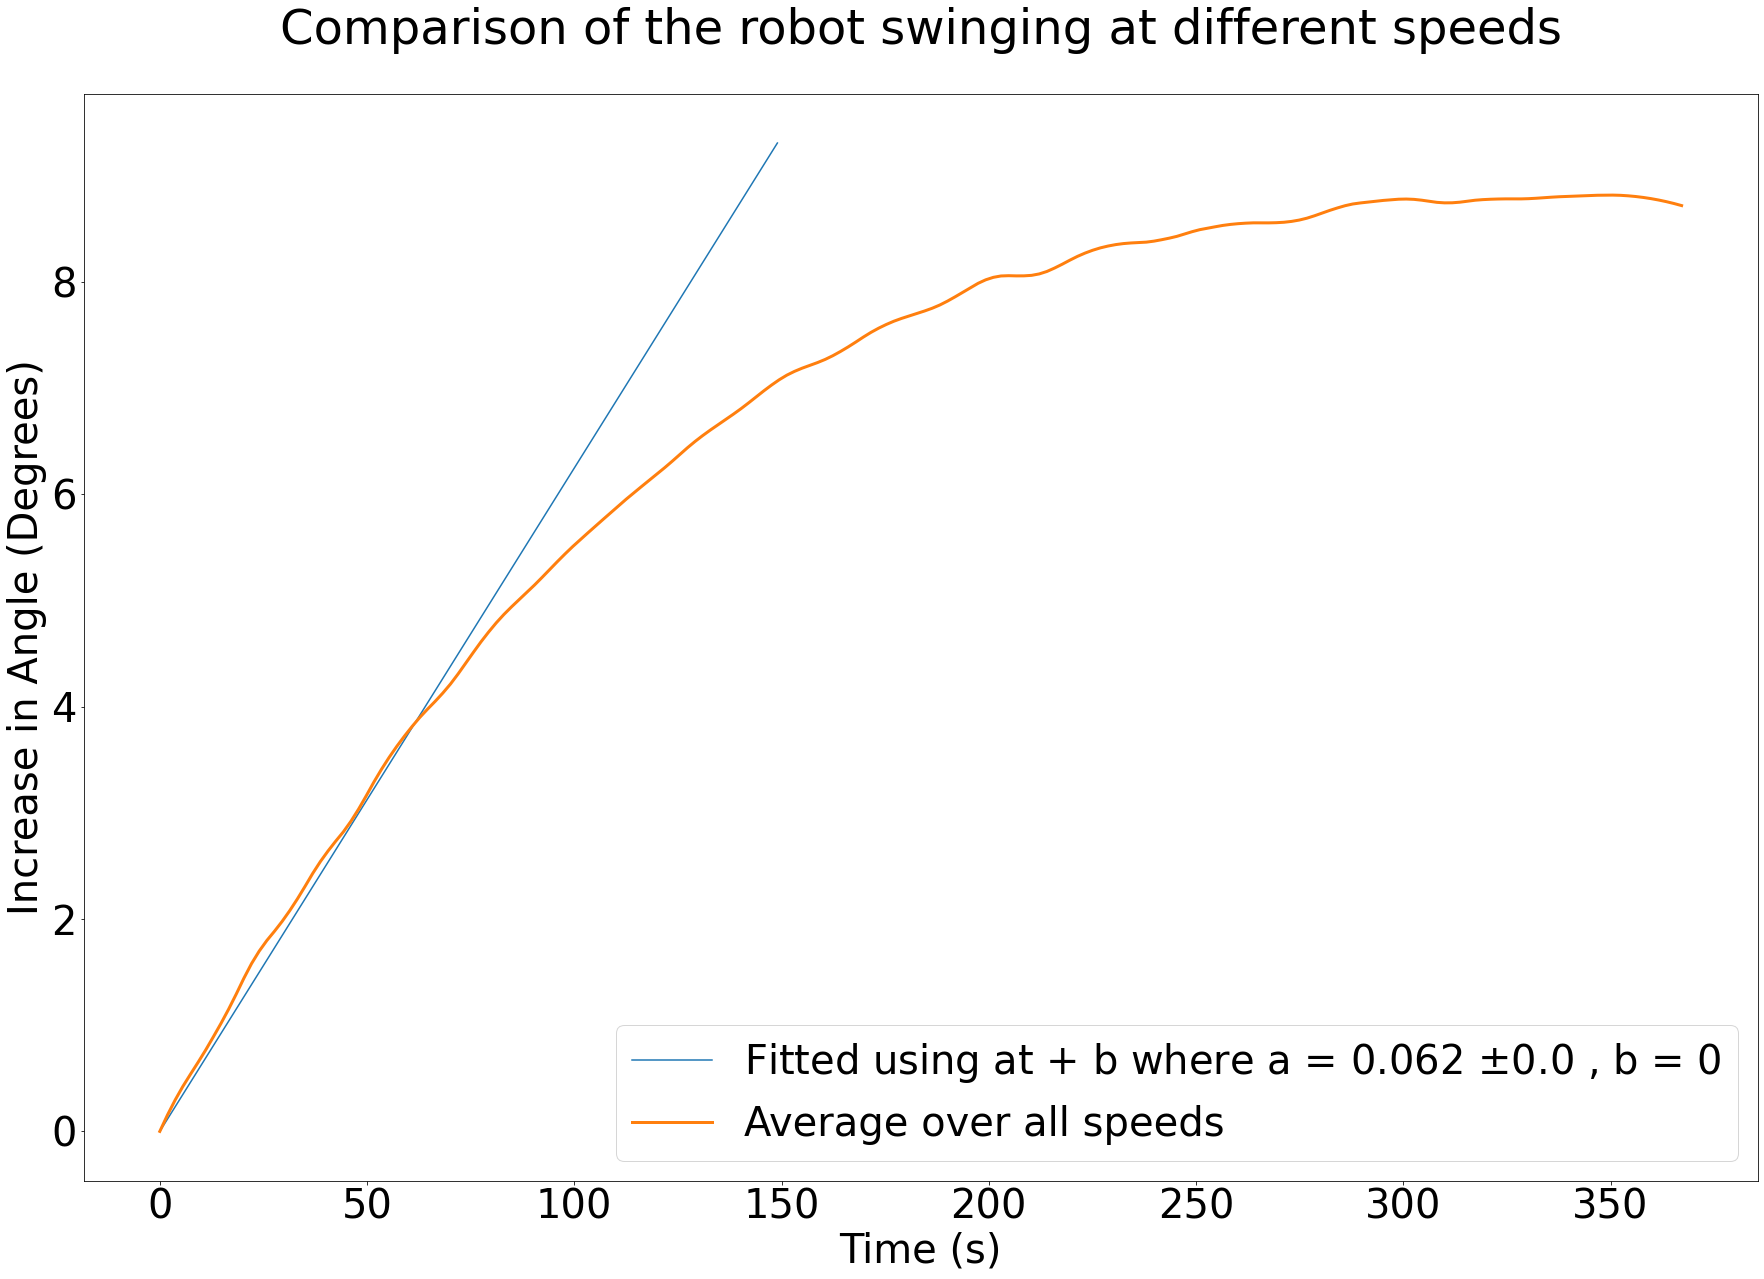

In [8]:
def s_line(t,a,b):
    return a*t+b

plt.figure(figsize=(30,20))
s_av = np.average(super_av,axis=0)
param = curve_fit(s_line,s_av[0][:30],s_av[1][:30])

plt.rc('font',size=40)
plt.xlabel('Time (s)')
plt.ylabel('Increase in Angle (Degrees)')
plt.title('Comparison of the robot swinging at different speeds', y= 1.04)

x = np.arange(0,150)
plt.plot(x,x*param[0][0] + 0, label = 'Fitted using at + b where a = '+str(np.round(param[0][0],3))+' $\pm$'+str(np.round(np.diag(param[1])[0],3))+' , b = 0')
plt.plot(s_av[0]-s_av[0][0],s_av[1]-s_av[1][0],label='Average over all speeds',linewidth=3)
plt.legend()
#plt.savefig('linear_fit.png')
plt.show()

[13.7109375, 13.359553161953349]
[13.721065235920218, 13.170622325175952]
[13.53515625, 13.031734992794512]
[13.073144407193372, 13.0078125]


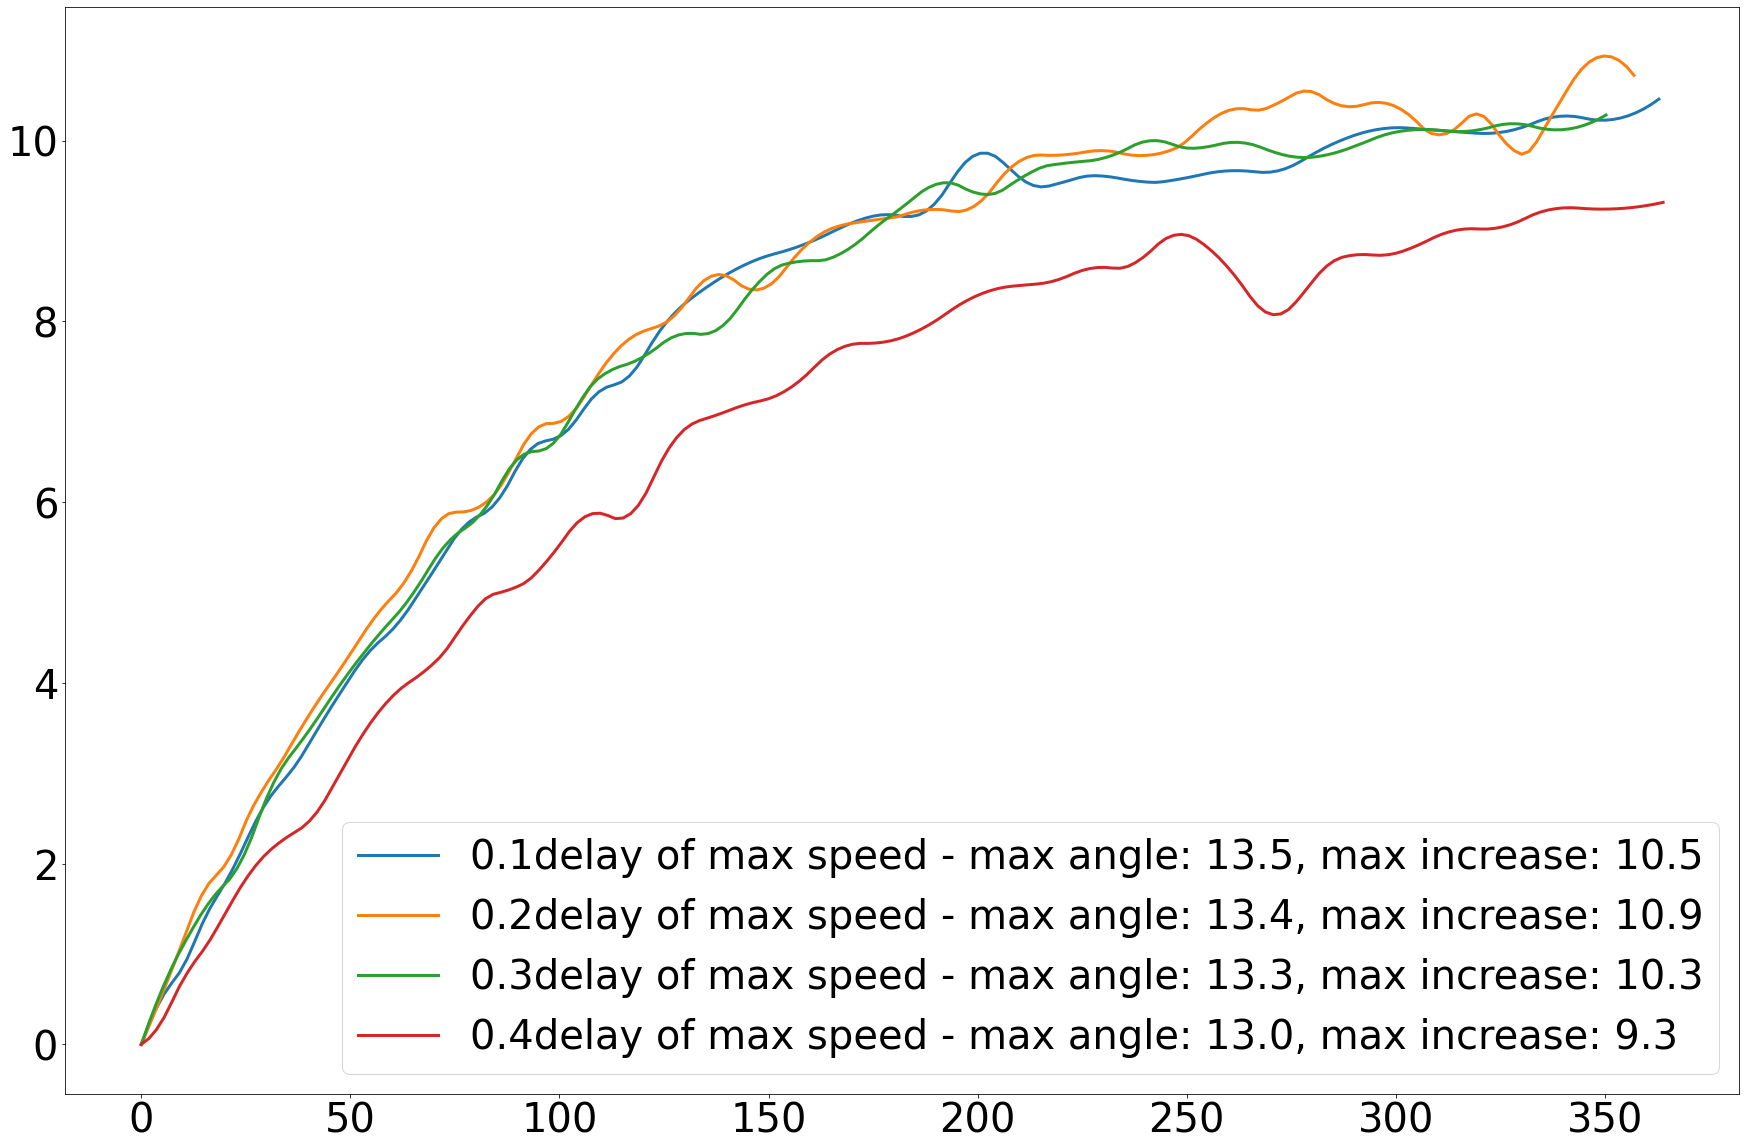

In [9]:
plt.figure(figsize=(30,20))
for i in ['0.1delay','0.2delay','0.3delay','0.4delay']:
    data = [data_peaks(i+str(j)) for j in range(1,3)]
    
    
    print ([max(data_peaks(i+str(k))[1]) for k in range(1,3)])
        
    av = np.average(data,axis=0)
    plt.plot(av[0]-av[0][0],av[1]-av[1][0],label=str(i) +' of max speed - max angle: '+str(np.round(max(av[1]),1))+', max increase: '+str(np.round(max(av[1]-av[1][0]),1)),linewidth=3)
    
plt.legend()
plt.show()

In [224]:
from scipy.optimize import curve_fit 

def s_line(t,a,b):
    return a*t+b

data1 = data_peaks("0.4delay3")

plt.figure(figsize=(30,20))
plt.rc('font',size=40)
plt.xlabel('Time (s)')
plt.ylabel('Angle (Degrees)')
plt.title('Comparison of the robot swinging at different speeds', y= 1.04)

popt, pcov = curve_fit(s_line, data1[0][0:25],  data1[1][0:25], p0 = [0.06, 0])
plt.plot( data1[0][0:80], s_line( data1[0][0:80],popt[0], popt[1]), label = "y = (0.0698 +/- 0.0007)x + (1+/-0.0165)", color = 'tab:orange')
#plt.plot( data1[0][0:80], s_line( data1[0][0:80],0.0698,1), label = "y = (0.0698 +/- 0.0007)x + (1+/-0.0165)", color = 'tab:orange')
plt.plot( data1[0][0:40], -s_line( data1[0][0:40],0.0698,+1.7),color = 'tab:orange')
#0.06187756

data = pickle.load(open( "0.4delay3.txt", "rb" ))### Remember to change the file name before doing another run otherwise it will overwrite
data = data[data[:,0]<20]
data = data[data[:,0]>-15]
#plt.figure(figsize=(20,20))
plt.rc('font',size=40)
# plt.xlabel('Time (s)')
# plt.ylabel('Angle (Degrees)')
# plt.title('', y= 1.04)

plt.axhline(y=max(data[:,0]),color='green',alpha=1,label='Maximum Angle: ' +"(" +str(np.round(max(data[:,0]),1))+ "+/- 0.1) degrees")
plt.ylim([-15, 20])
plt.plot(data[:,-1] - data[:,-1][0] ,data[:,0],label='Large encoder angle', color = 'tab:blue')
#plt.xticks(fontsize=14)
plt.legend(loc='lower left')
#plt.savefig(of_max+'delay.png')
plt.title("Amplitude of swing for rotational algorithm run for 6 minutes at 0.8 fraction of max speed", fontsize = 50, y= 1.04)
plt.show()
        

print(popt[0])   
    
chi_squared = 0

# for counter,value in enumerate(data1[0][0:25]):
    
#     print(data1[1][counter])
#     c = (data1[1][counter]-(0.0698*data1[0][counter]-1))
#     x = c/0.1**2
#     chi_squared += c
    
# #print(chi_squared/26)
    
    
        
        
        
# print(popt)
# print(pcov)
        
        
        
        
#plt.plot(data[0][0:25], data[1][0:25])
#plt.plot()

#print(popt[0],popt[1],)

FileNotFoundError: [Errno 2] No such file or directory: '0.4delay3.txt'

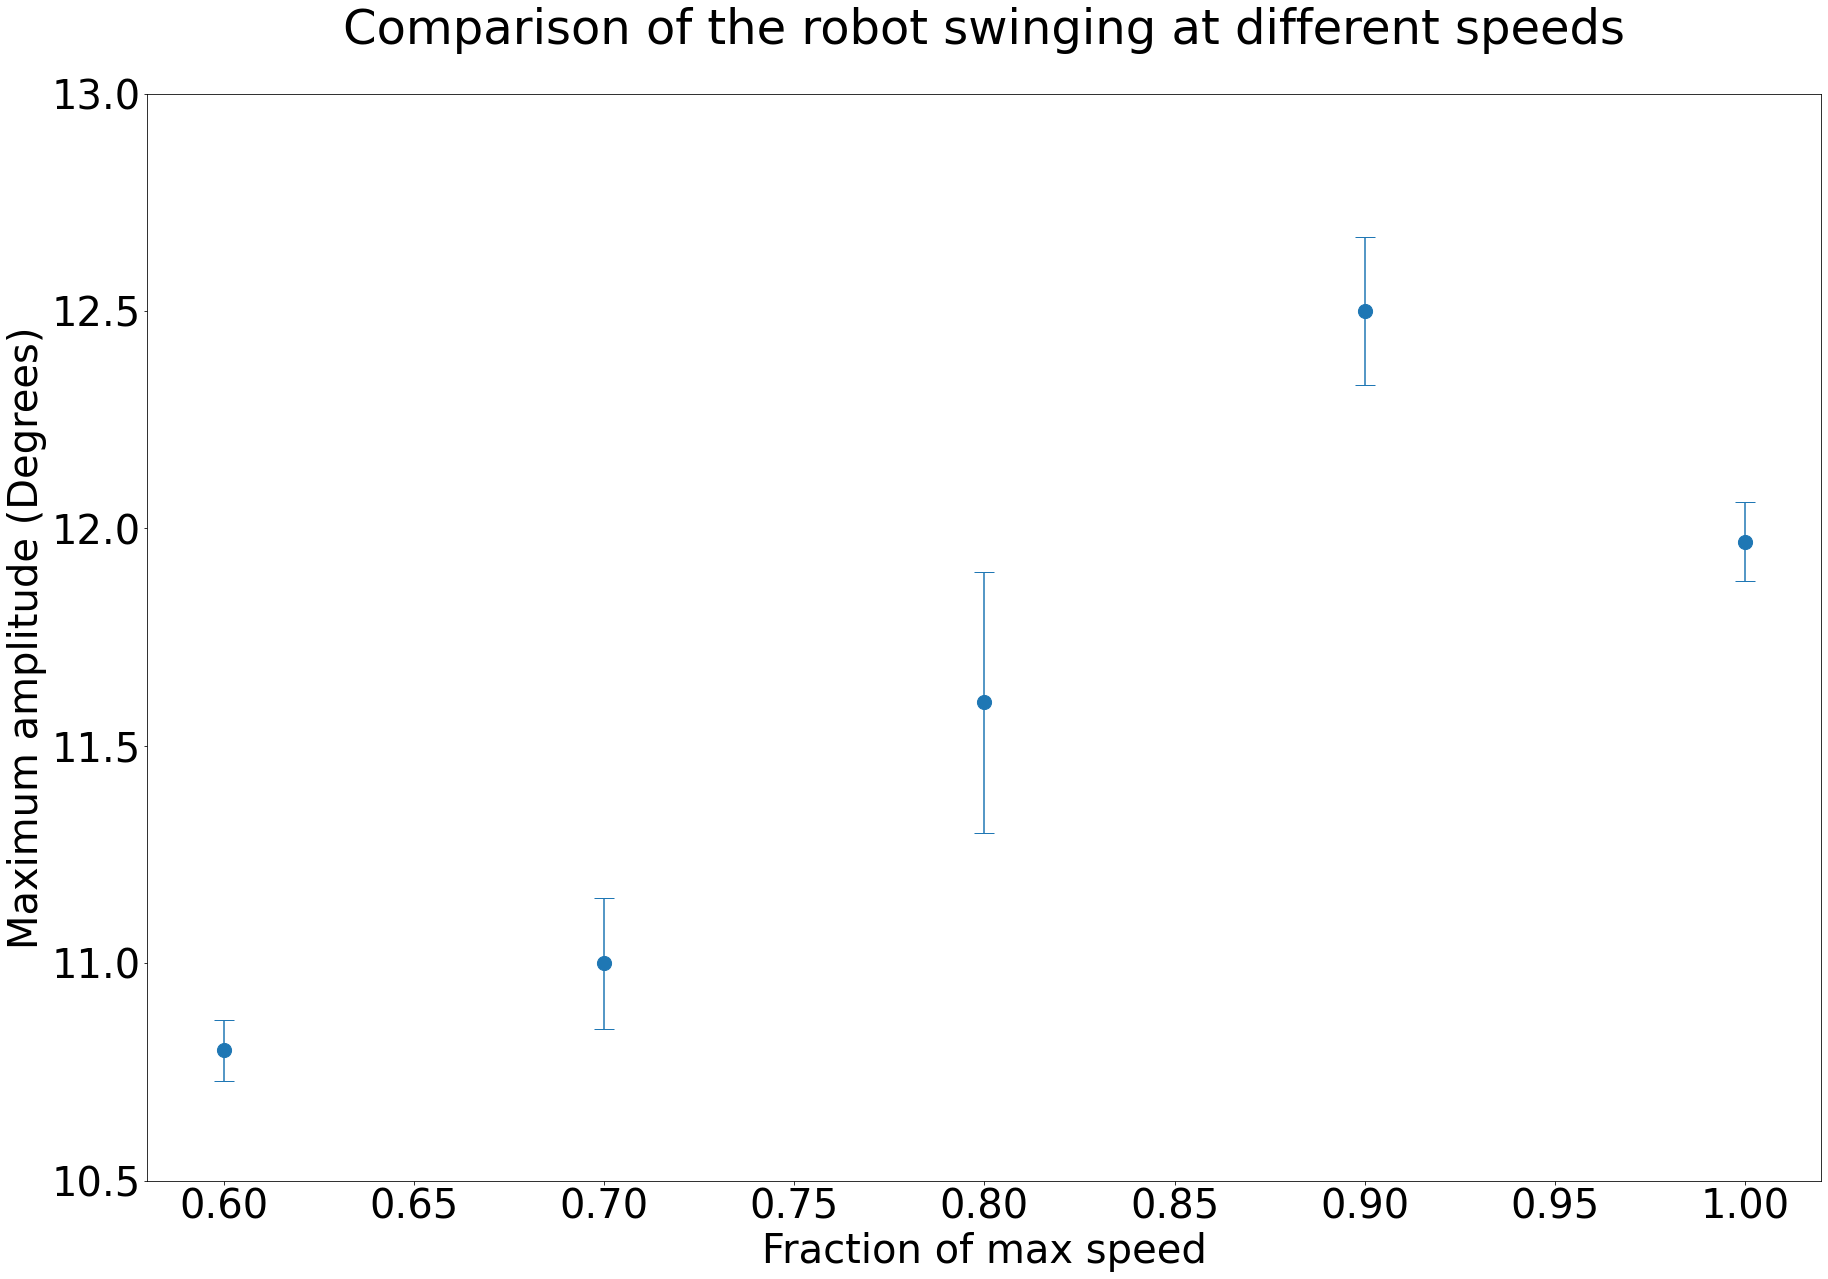

In [182]:

plt.figure(figsize=(30,20))
plt.rc('font',size=40)
plt.xlabel('Fraction of max speed')
plt.ylabel('Maximum amplitude (Degrees)')
plt.title('Comparison of the robot swinging at different speeds', y= 1.04)

x = [0.6, 0.7, 0.8, 0.9, 1]
y = [10.8, 11, 11.6, 12.5, 11.97]
y_error = [0.07, 0.15, 0.3, 0.17, 0.09]
plt.errorbar(x,y, yerr = y_error, capsize = 10, ls= 'none' )
plt.ylim([10.5, 13])
plt.scatter(x,y, s = 200)

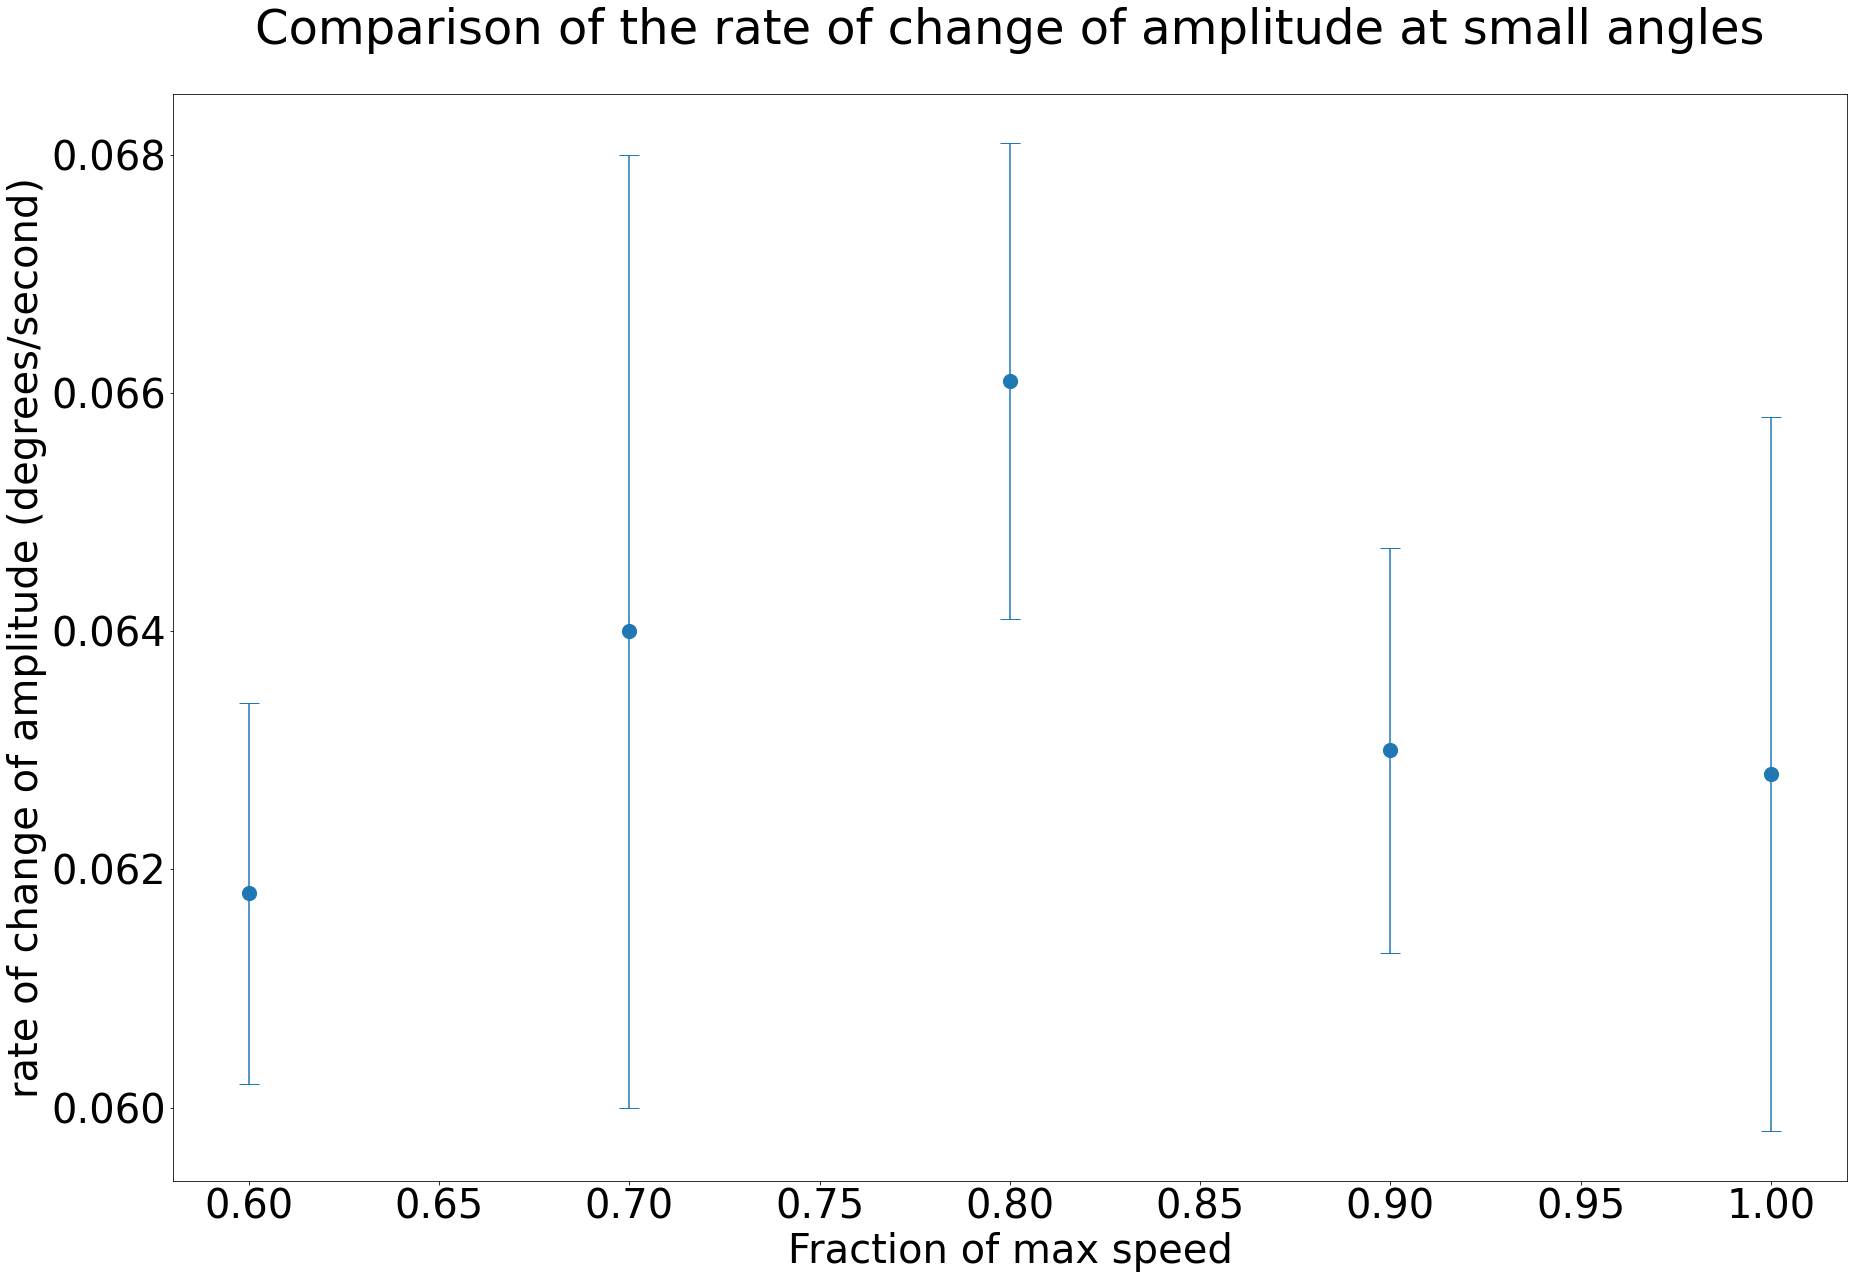

In [207]:
plt.figure(figsize=(30,20))
plt.rc('font',size=40)
plt.xlabel('Fraction of max speed')
plt.ylabel('rate of change of amplitude (Degrees)')
plt.title('Comparison of the rate of change of amplitude at small angles', y= 1.04)

x = [0.6, 0.7, 0.8, 0.9, 1]
y = [0.0618, 0.064, 0.0661, 0.063, 0.0628]
y_error = [0.0016, 0.004, 0.002, 0.0017, 0.003]
plt.errorbar(x,y, yerr = y_error, capsize = 10, ls= 'none' )
##plt.ylim([10.5, 13])
plt.scatter(x,y, s = 200)

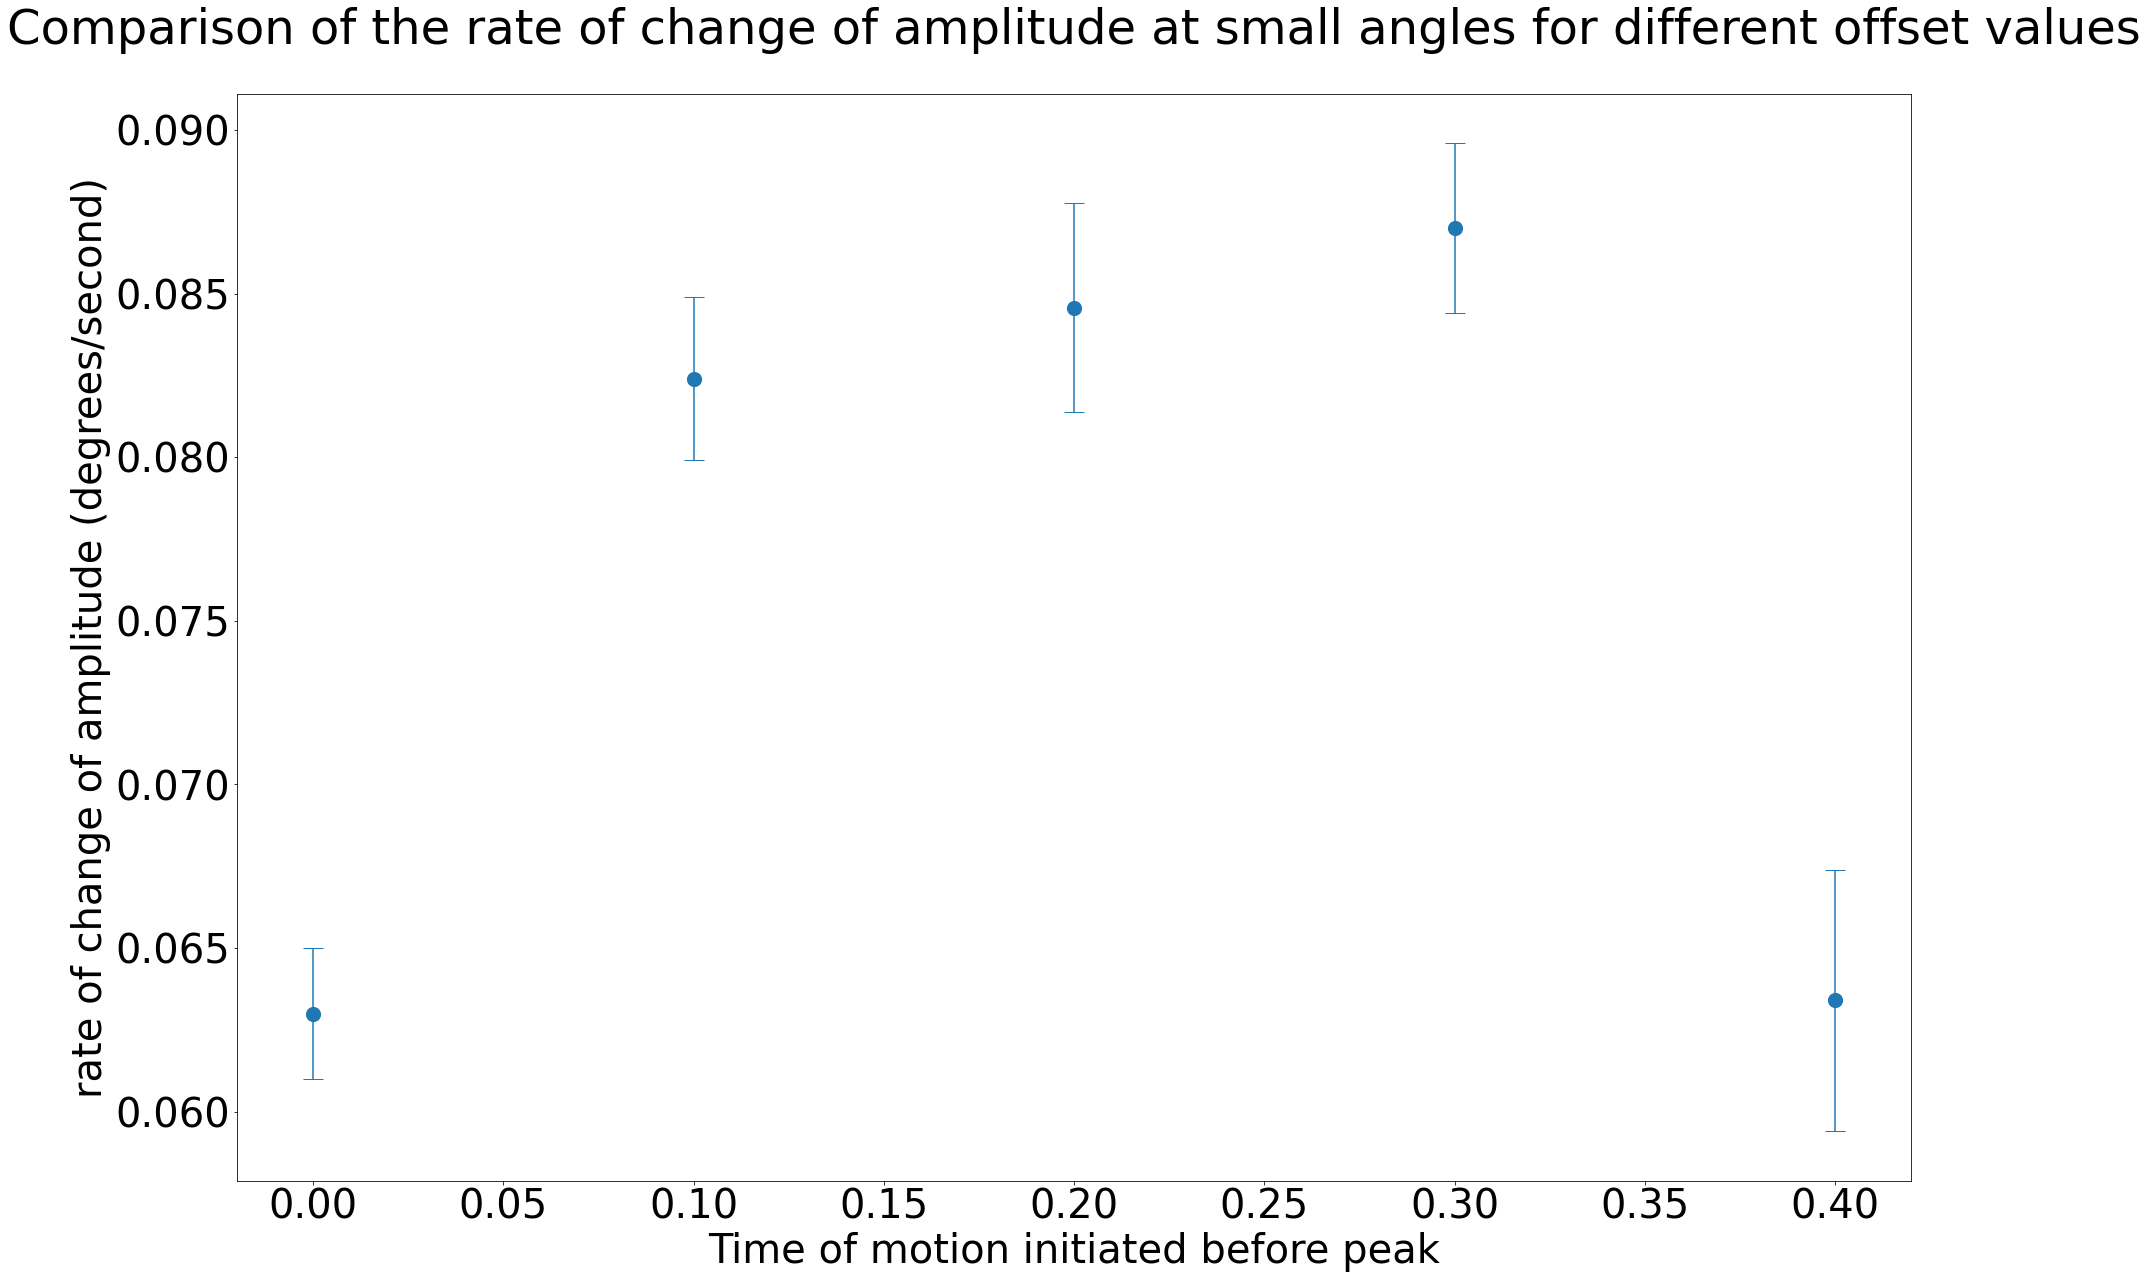

In [280]:
import numpy as np
d1g = [0.0829, 0.0819]
d1a = [13.4, 13.7, 14.8]
d2g = [0.087, 0.0885, 0.0782]
d2a = [13.7, 13, 13.5]
d3g = [0.087,0.087]
d3a = [13.5, 13, 13.7]
d4g = [0.0678, 0.059]
d4a = [13, 13]


plt.figure(figsize=(30,20))
plt.rc('font',size=40)
plt.xlabel('Time of motion initiated before peak')
plt.ylabel('rate of change of amplitude (degrees/second)')
plt.title('Comparison of the rate of change of amplitude at small angles for different offset values', y= 1.04)

x = [0,0.1,0.2,0.3,0.4]
y1 = [0.063, np.average(d1g),np.average(d2g),np.average(d3g),np.average(d4g)]
y_error1 = [0.002, 0.0025, 0.0032, 0.0026,  0.004 ]
plt.errorbar(x,y1, yerr = y_error1, capsize = 10, ls= 'none' )
##plt.ylim([10.5, 13])
plt.scatter(x,y1, s = 200)


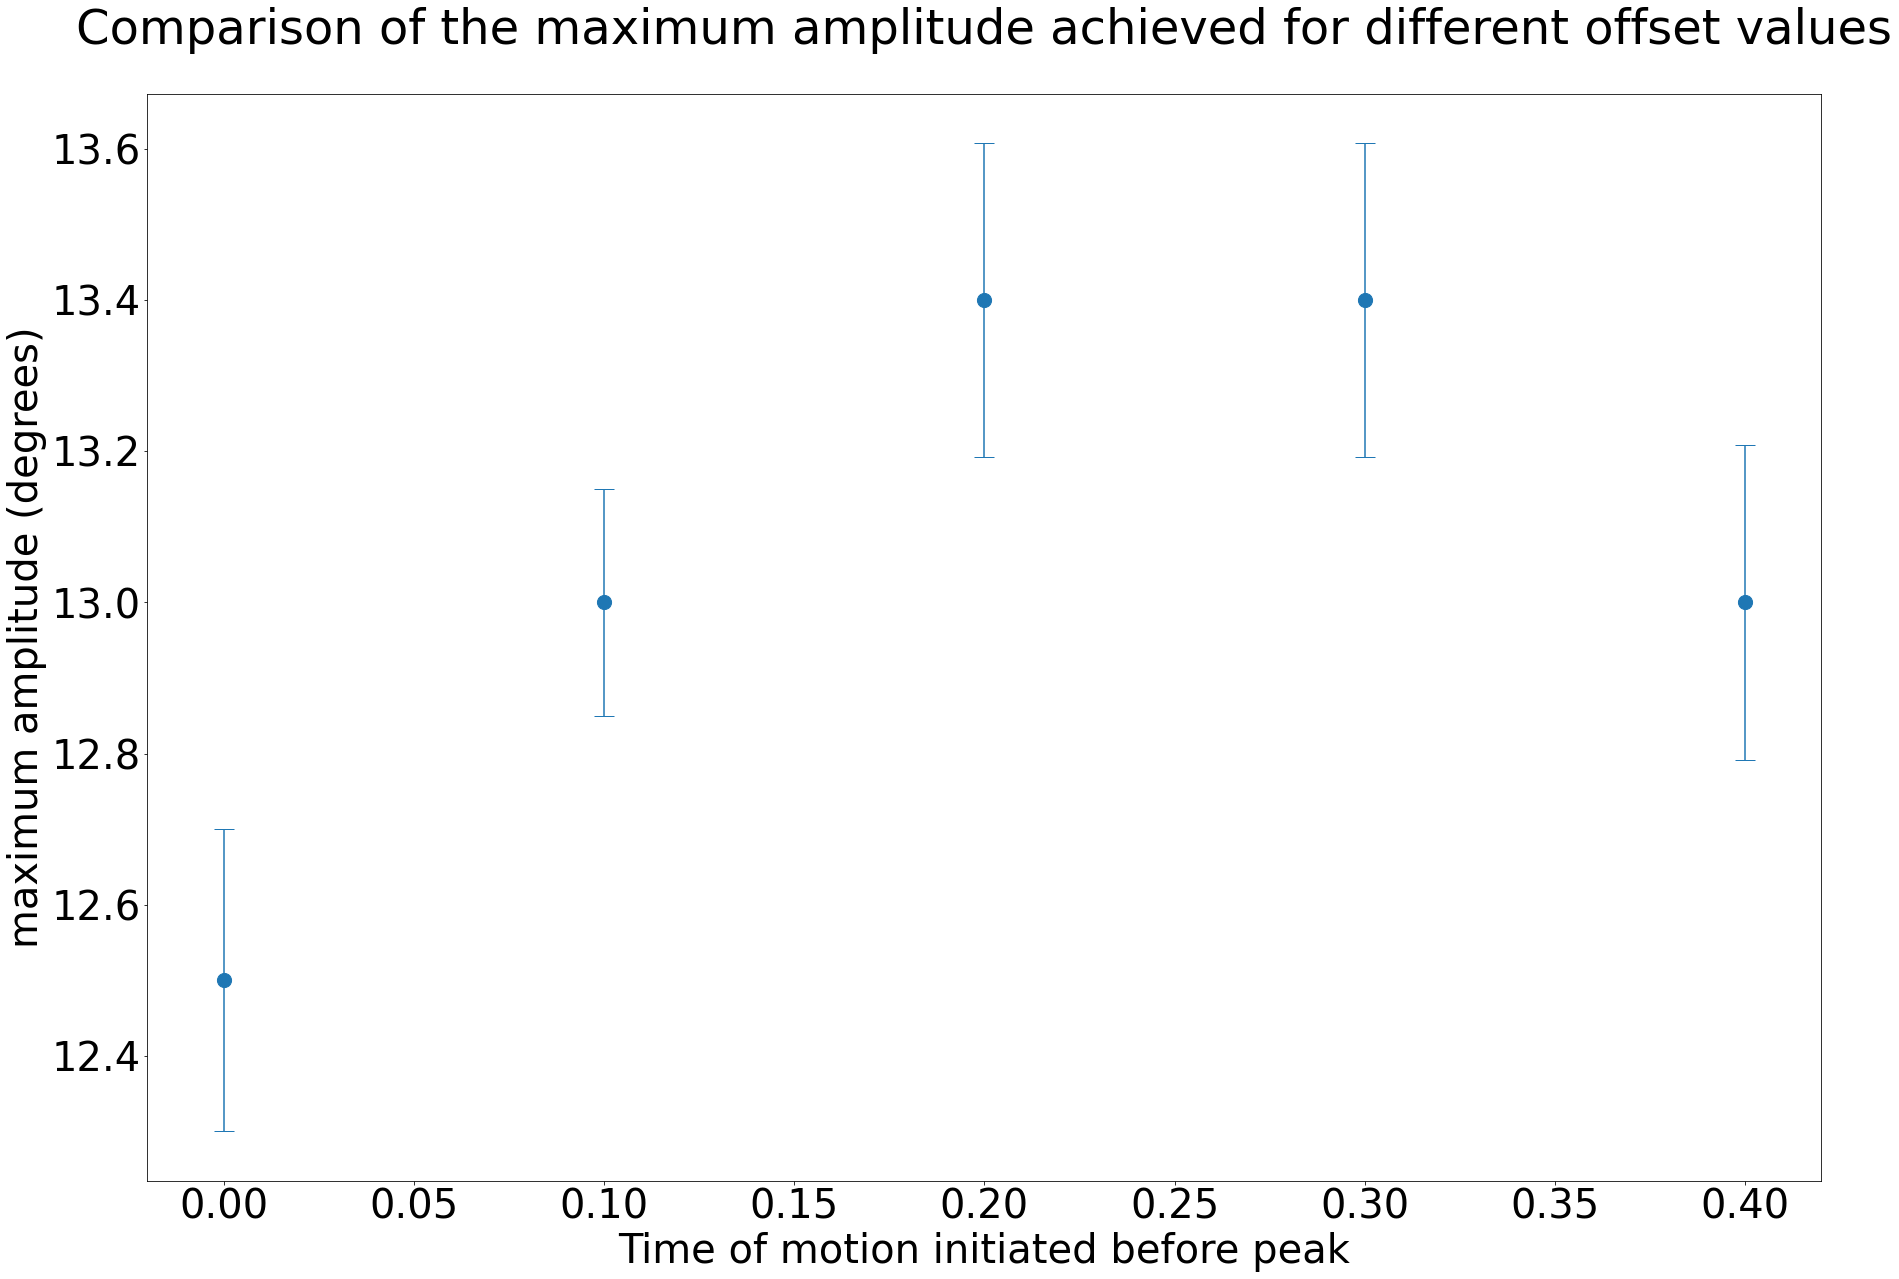

In [283]:
import numpy as np
d1g = [0.0829, 0.0819]
d1a = [13.4, 13.7, 14.8]
d2g = [0.087, 0.0885, 0.0782]
d2a = [13.7, 13, 13.5]
d3g = [0.087,0.087]
d3a = [13.5, 13, 13.7]
d4g = [0.0678, 0.059]
d4a = [13, 13]


plt.figure(figsize=(30,20))
plt.rc('font',size=40)
plt.xlabel('Time of motion initiated before peak')
plt.ylabel('maximum amplitude (degrees)')
plt.title('Comparison of the maximum amplitude achieved for different offset values', y= 1.04)

x = [0,0.1,0.2,0.3,0.4]
y2 = [12.5, 13,np.average(d2a),np.average(d3a),np.average(d4a)]
y_error2 = [0.2, 0.15, 0.208, 0.208, 0.208 ]
plt.errorbar(x,y2, yerr = y_error2, capsize = 10, ls= 'none' )
##plt.ylim([10.5, 13])
plt.scatter(x,y2, s = 200)

AttributeError: 'Text' object has no property 'linewidth'

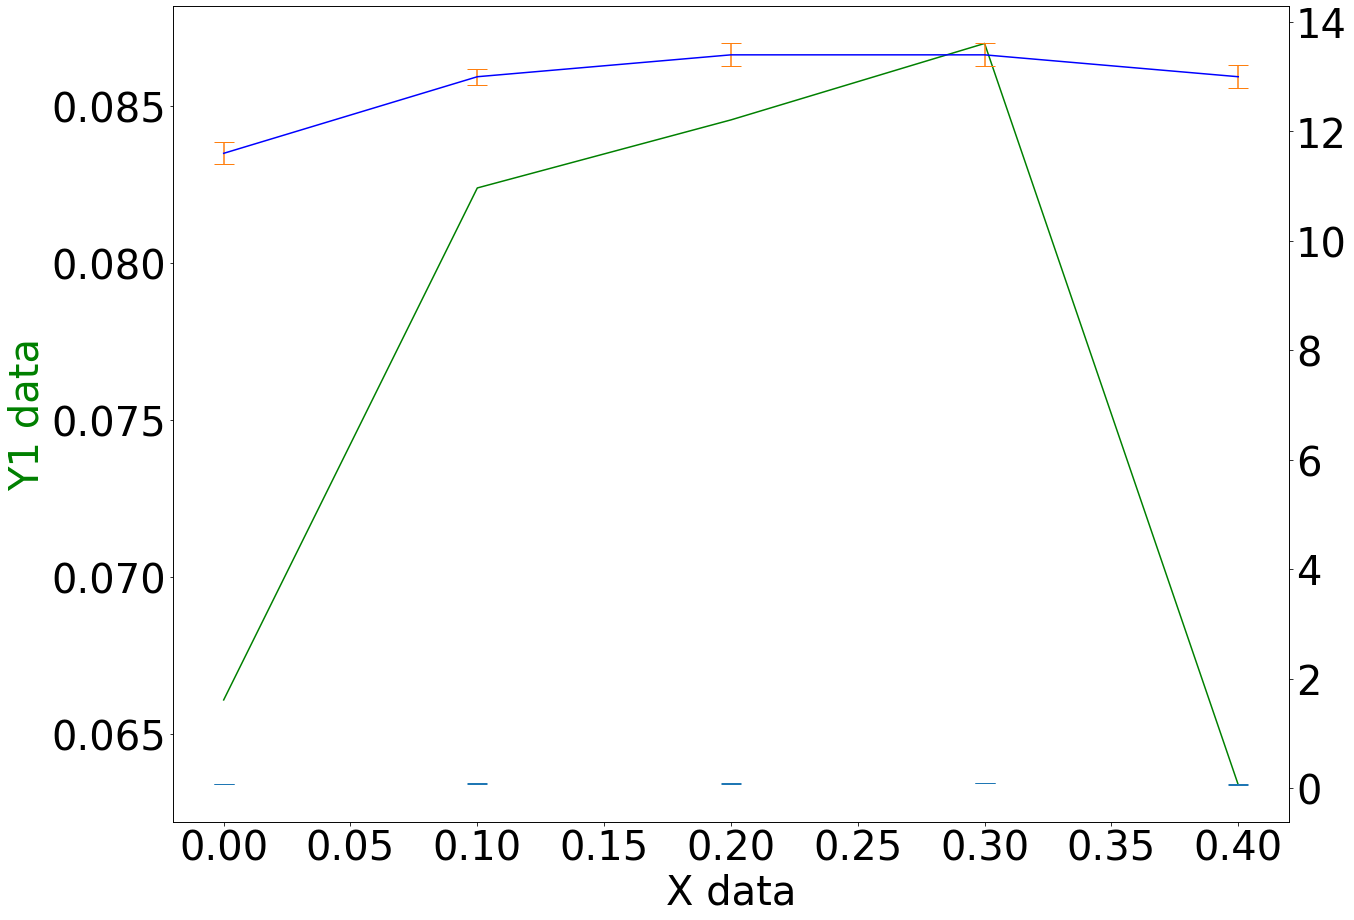

In [274]:
fig, ax1 = plt.subplots()

fig.set_size_inches(20, 15)


ax2 = ax1.twinx()
ax1.plot(x, y1, 'g')
ax2.plot(x, y2, 'b')

plt.errorbar(x,y1, yerr = y_error1, capsize = 10, ls= 'none' )
plt.errorbar(x,y2, yerr = y_error2, capsize = 10, ls= 'none' )




ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g', linewidth = 0)
ax2.set_ylabel('Y2 data', color='b')